<a href="https://colab.research.google.com/github/ramonfercruz/cotacao_saca_cafe_aribica/blob/main/analise_serie.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
from google.colab import drive
import pandas as pd
import keras
import tensorflow as tf
drive.mount('/content/drive')
DIRETORIO = '/content/drive/MyDrive/TCC/data/20230815'

Mounted at /content/drive


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import datetime


import matplotlib.ticker as ticker
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

In [ ]:
data_frame = pd.read_excel(os.path.join(DIRETORIO,'cotacao_cafe_inrriquecida.xlsx')).query('ano >= 2010')
data_frame['diesel'].fillna(method='ffill', inplace=True)
data_frame.set_index('Data', inplace=True)
data_frame.sort_index(  inplace=True)

In [ ]:
data_frame.describe()

,dolar,cafe_aribica,indices_preco_produtos,cafe_robusta,ano,mes,INDICE,IPCA_MES,3_MESES,IPCA_6_MESES,...,December,February,January,July,June,March,May,November,October,September
count,163.000000,163.000000,162.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,...,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000
mean,3.399018,554.786933,385.450000,369.442761,2016.300613,6.392638,4647.606626,0.488282,1.480245,2.985153,...,0.079755,0.085890,0.085890,0.085890,0.085890,0.085890,0.085890,0.079755,0.079755,0.079755
std,1.312625,289.180883,186.860862,168.764312,3.937999,3.450596,1041.090759,0.371514,0.917709,1.503574,...,0.271748,0.281064,0.281064,0.281064,0.281064,0.281064,0.281064,0.271748,0.271748,0.271748
min,1.560000,247.730000,170.200000,158.230000,2010.000000,1.000000,3040.220000,-0.680000,-1.320000,0.100000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.125000,407.880000,262.825000,253.485000,2013.000000,3.000000,3711.100000,0.250000,0.765000,1.895000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.260000,456.950000,320.100000,309.440000,2016.000000,6.000000,4752.860000,0.470000,1.510000,2.730000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.550000,533.680000,398.050000,411.580000,2020.000000,9.000000,5328.440000,0.745000,2.085000,4.075000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,5.660000,1485.350000,847.200000,830.770000,2023.000000,12.000000,6667.940000,1.620000,3.830000,6.250000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
data_frame.corr()['cafe_aribica']

<ipython-input-5-468b4b334206>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_frame.corr()['cafe_aribica']


dolar                            0.711314
cafe_aribica                     1.000000
indices_preco_produtos           0.886086
cafe_robusta                     0.935929
ano                              0.715325
mes                             -0.009166
INDICE                           0.771897
IPCA_MES                         0.131671
3_MESES                          0.212444
IPCA_6_MESES                     0.331870
IPCA_ANO                         0.202532
12_MESES                         0.448819
diesel                           0.891548
cafe_aribica_dif                 0.076590
cafe_aribica_mov_quadrimestre    0.984719
cafe_aribica_mov_semestre        0.971072
cafe_aribica_mov_anual           0.921460
inverno                         -0.020247
outono                           0.008776
primavera                       -0.009514
verao                            0.020756
April                            0.003845
August                          -0.014784
December                         0

In [ ]:
def compara_treino_teste(y, y_train_predict, y_pred, scaler_y):
    train_size = len(y_train_predict)
    y_size = len(y)
    test_size = len(test_y)

    plt.figure(figsize=(20, 6))
    ax = sns.lineplot(y=reshape_y(y), x=range(y_size), color='#ff7f0e',label='Valor real')
    ax1 = sns.lineplot(y=reshape_y(y_train_predict), x=range(train_size), linestyle='--', color='#17becf', label='Predição treino')
    ax2 = sns.lineplot(y=reshape_y(y_pred), x=range(train_size, train_size + test_size), linestyle=':', color='#1f77b4',label='Predição Teste')
    ax.set_ylabel('Cotação Café')
    ax.set_xlabel('Período')

In [ ]:
data_frame.columns

Index(['dolar', 'cafe_aribica', 'indices_preco_produtos', 'cafe_robusta',
       'ano', 'mes', 'mes.1', 'INDICE', 'IPCA_MES', '3_MESES', 'IPCA_6_MESES',
       'IPCA_ANO', '12_MESES', 'diesel', 'cafe_aribica_dif',
       'cafe_aribica_mov_quadrimestre', 'cafe_aribica_mov_semestre',
       'cafe_aribica_mov_anual', 'data_real', 'estacao_ano', 'inverno',
       'outono', 'primavera', 'verao', 'April', 'August', 'December',
       'February', 'January', 'July', 'June', 'March', 'May', 'November',
       'October', 'September'],
      dtype='object')

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
resultados = seasonal_decompose(data_frame.cafe_aribica, period=12)
seasonal = resultados.seasonal
tendencia = resultados.trend

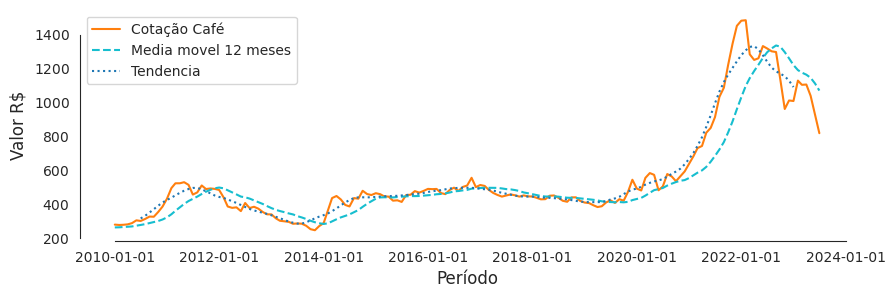

In [ ]:
plt.figure(figsize=(10, 3))
sns.set_style('white')
ax = sns.lineplot(data=data_frame, y='cafe_aribica', x=data_frame.index, label='Cotação Café', color='#ff7f0e')
ax1 = sns.lineplot(data=data_frame, y='cafe_aribica_mov_anual', x=data_frame.index, linestyle='--', color='#17becf', label='Media movel 12 meses')
ax1 = sns.lineplot(data=tendencia, linestyle=':', color='#1f77b4', label='Tendencia')
ax.set_ylabel('Valor R$' , fontsize=12)
ax.set_xlabel('Período', fontsize=12)
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter("$%g$"))
sns.despine(trim=True)

In [ ]:
seasonal

Data
2010-01-01    12.031989
2010-02-01    20.026174
2010-03-01     4.584472
2010-04-01    -5.378444
2010-05-01    -6.425944
                ...    
2023-03-01     4.584472
2023-04-01    -5.378444
2023-05-01    -6.425944
2023-06-01   -13.315562
2023-07-01   -12.342467
Name: seasonal, Length: 163, dtype: float64

In [ ]:
df_seasonal =  pd.DataFrame(seasonal)

In [ ]:
df_seasonal

,seasonal
Data,
2010-01-01,12.031989
2010-02-01,20.026174
2010-03-01,4.584472
2010-04-01,-5.378444
2010-05-01,-6.425944
...,...
2023-03-01,4.584472
2023-04-01,-5.378444
2023-05-01,-6.425944


In [ ]:
map_meses = {1:'Jan',
2:'Fev',
3:'Mar',
4:'Abr',
5:'Mai',
6:'Jun',
7:'Jul',
8:'Ago',
9:'Set',
10:'Out',
11:'Nov',
12:'Dez'}
df_seasonal['data']  = pd.to_datetime(df_seasonal.index)
df_seasonal['mes'] = df_seasonal.data.dt.month
df_seasonal['ano'] = df_seasonal.data.dt.year
df_seasonal['mes'] = df_seasonal['mes'].map(map_meses)

In [ ]:
df_seasonal

,seasonal,data,mes,ano
Data,,,,
2010-01-01,12.031989,2010-01-01,Jan,2010
2010-02-01,20.026174,2010-02-01,Fev,2010
2010-03-01,4.584472,2010-03-01,Mar,2010
2010-04-01,-5.378444,2010-04-01,Abr,2010
2010-05-01,-6.425944,2010-05-01,Mai,2010
...,...,...,...,...
2023-03-01,4.584472,2023-03-01,Mar,2023
2023-04-01,-5.378444,2023-04-01,Abr,2023
2023-05-01,-6.425944,2023-05-01,Mai,2023


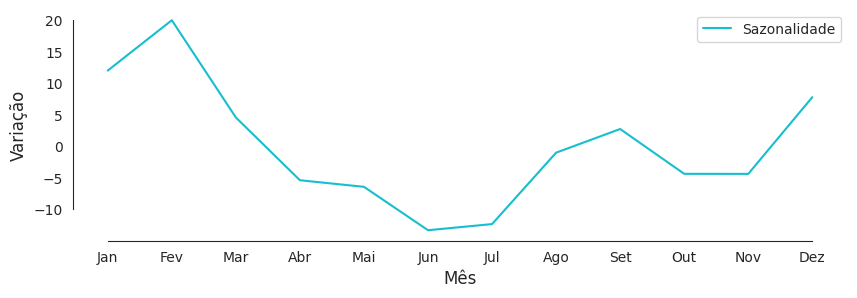

In [ ]:
plt.figure(figsize=(10, 3))
sns.set_style('white')
ax = sns.lineplot(data=df_seasonal.query('ano == 2010'), y='seasonal', x='mes' ,label='Sazonalidade', color='#17becf')
ax.set_ylabel('Variação', fontsize=12)
ax.set_xlabel('Mês', fontsize=12)
sns.despine(trim=True)

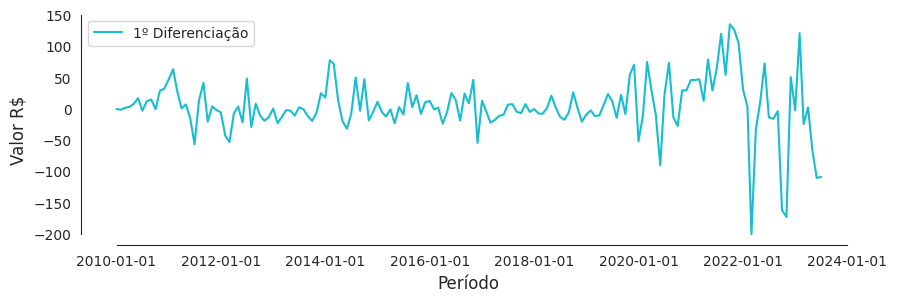

In [ ]:
plt.figure(figsize=(10, 3))
sns.set_style('white')
ax = sns.lineplot(data=data_frame, y='cafe_aribica_dif', x=data_frame.index, label='1º Diferenciação', color='#17becf')
ax.set_ylabel('Valor R$', fontsize=12)
ax.set_xlabel('Período', fontsize=12)
sns.despine(trim=True)

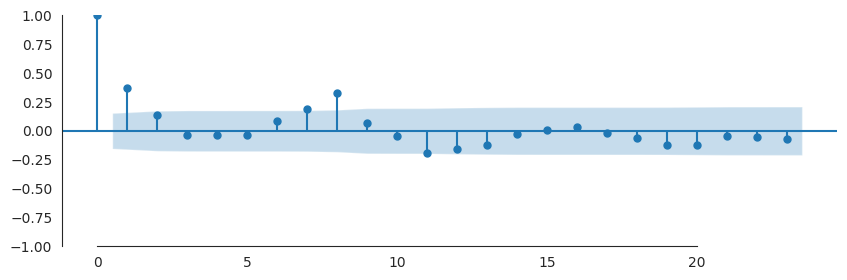

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig = plt.figure(figsize=(10, 3))
ax1 = fig.add_subplot(111)
ax = plot_acf(data_frame.cafe_aribica_dif, ax=ax1, title='')
sns.despine(trim=True)


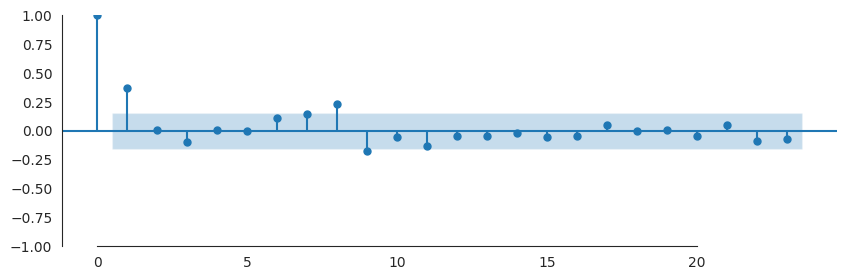

In [ ]:
fig = plt.figure(figsize=(10, 3))
ax1 = fig.add_subplot(111)
ax = plot_pacf(data_frame.cafe_aribica_dif, ax=ax1, title='')
sns.despine(trim=True)

In [ ]:
data_frame.columns

Index(['dolar', 'cafe_aribica', 'indices_preco_produtos', 'cafe_robusta',
       'ano', 'mes', 'mes.1', 'INDICE', 'IPCA_MES', '3_MESES', 'IPCA_6_MESES',
       'IPCA_ANO', '12_MESES', 'diesel', 'cafe_aribica_dif',
       'cafe_aribica_mov_quadrimestre', 'cafe_aribica_mov_semestre',
       'cafe_aribica_mov_anual', 'data_real', 'estacao_ano', 'inverno',
       'outono', 'primavera', 'verao', 'April', 'August', 'December',
       'February', 'January', 'July', 'June', 'March', 'May', 'November',
       'October', 'September'],
      dtype='object')

In [ ]:
data_frame['cafe_dolar'] = data_frame.cafe_aribica / data_frame.dolar

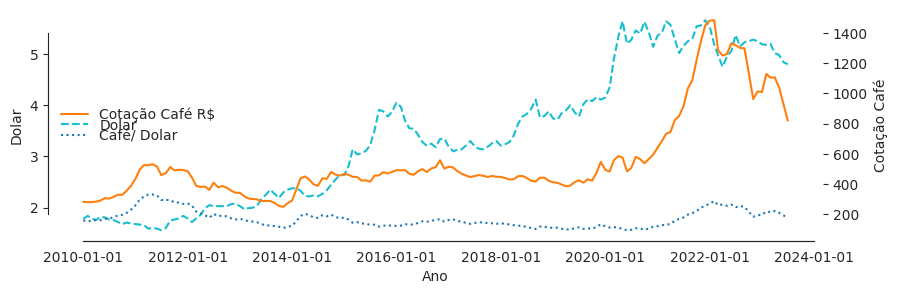

In [ ]:
plt.figure(figsize=(10, 3))
sns.set_style('white')
ax = sns.lineplot(data=data_frame, y='dolar', x=data_frame.index, linestyle='--', color='#17becf', label='Dolar')
ax1 = sns.lineplot(data=data_frame, y='cafe_aribica', x=data_frame.index, label='Cotação Café R$', color='#ff7f0e',  ax=ax.twinx())
ax2 = sns.lineplot(data=data_frame, y='cafe_dolar', x=data_frame.index, linestyle=':', color='#1f77b4', label='Café/ Dolar')
ax.legend( loc=6,frameon=False)
ax2.legend(loc=6, frameon=False)
ax.set_ylabel('Dolar',  )
ax1.set_ylabel('Cotação Café')
ax.set_xlabel('Ano')
sns.despine(trim=True)


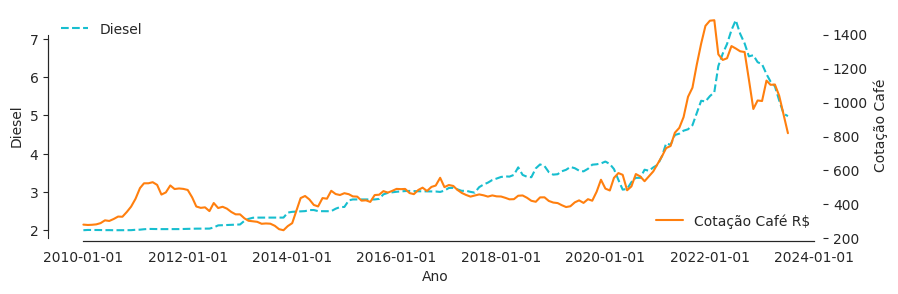

In [ ]:
plt.figure(figsize=(10, 3))
sns.set_style('white')
ax = sns.lineplot(data=data_frame, y='diesel', x=data_frame.index, linestyle='--', color='#17becf', label='Diesel')
ax1 = sns.lineplot(data=data_frame, y='cafe_aribica', x=data_frame.index, label='Cotação Café R$', color='#ff7f0e',  ax=ax.twinx())

ax.legend( loc=0,frameon=False)
ax1.legend(loc=4, frameon=False)
ax.set_ylabel('Diesel',  )
ax1.set_ylabel('Cotação Café')
ax.set_xlabel('Ano')
sns.despine(trim=True)

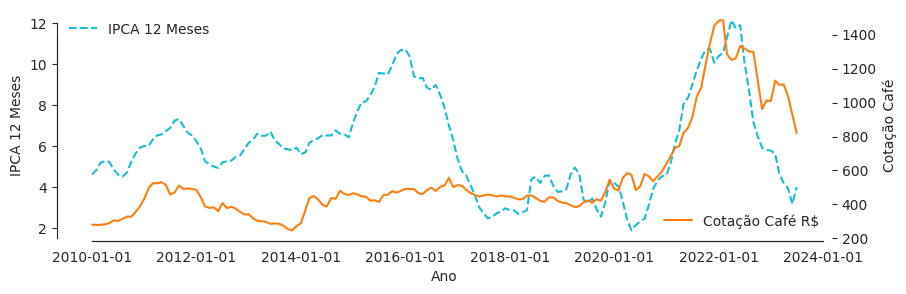

In [ ]:
plt.figure(figsize=(10, 3))
sns.set_style('white')
ax = sns.lineplot(data=data_frame, y='12_MESES', x=data_frame.index, linestyle='--', color='#17becf', label='IPCA 12 Meses')
ax1 = sns.lineplot(data=data_frame, y='cafe_aribica', x=data_frame.index, label='Cotação Café R$', color='#ff7f0e',  ax=ax.twinx())

ax.legend( loc=0,frameon=False)
ax1.legend(loc=4, frameon=False)
ax.set_ylabel('IPCA 12 Meses',  )
ax1.set_ylabel('Cotação Café')
ax.set_xlabel('Ano')
sns.despine(trim=True)